In [74]:
#проверка подключения PostgreSQL 
import psycopg2
import pandas as pd
#Библиотека для визуализации
from IPython.display import HTML
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#!введите свои реквизиты!
DB_HOST = '52.157.159.24'
DB_USER = 'student24'
DB_USER_PASSWORD = 'student24_password'
DB_NAME = 'sql_ex_for_student24'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

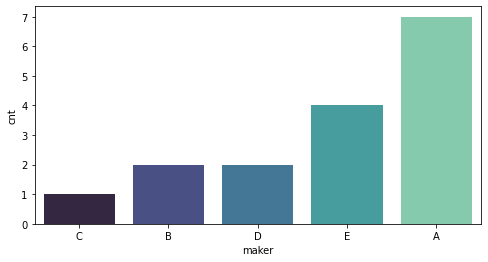

In [53]:
# task6 (lesson4)
# Компьютерная фирма: Сделать view с количеством товаров (название count_products_by_makers) по каждому производителю. 
# Во view: maker, count

request = """
	select maker, count(model) as cnt
	from product
	group by maker
	order by cnt
"""

df = pd.read_sql_query(request, conn)
fig, ax = plt.subplots(figsize=(8,4)) 
sns.barplot(x = df.maker, y = df.cnt, palette="mako")
plt.show()

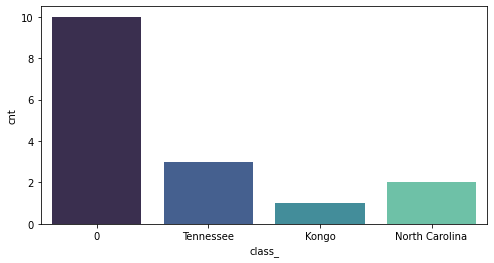

In [69]:
# task11 (lesson4)
# Корабли: По предыдущему view (sunk_ships_by_classes) сделать график в colab (X: class, Y: count)

request = """
select count(o.result) as cnt,
	case 
		when class is null
		then '0'
		else "class" 
		end class_
	from outcomes o
	left join
		ships sh on sh."name" = o.ship 
	group by "class"
"""

df = pd.read_sql_query(request, conn)
fig, ax = plt.subplots(figsize=(8,4)) 
sns.barplot(x = df.class_, y = df.cnt, palette="mako")
plt.show()

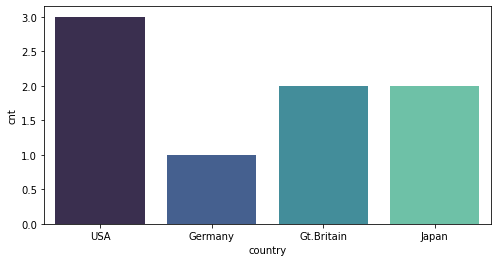

In [57]:
# task13 (lesson4)
# Корабли: Сделать график в colab по таблице classes с количеством классов по странам (X: country, Y: count)

request = """
select country, count("class") cnt
from classes
group by country 
"""

df = pd.read_sql_query(request, conn)
fig, ax = plt.subplots(figsize=(8,4)) 
sns.barplot(x = df.country, y = df.cnt, palette="mako")
plt.show()

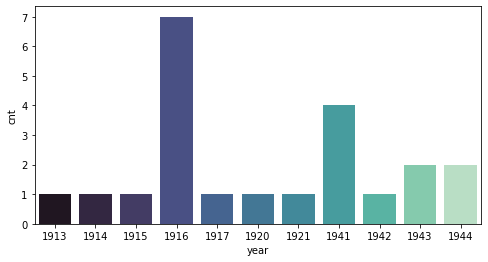

In [75]:
# task16 (lesson4)
# Корабли: Построить график с количеством запущенных на воду кораблей и годом запуска (X: year, Y: count)

request = """
select 
	count(name) as cnt,
	launched as year
from 
	ships s
group by year
"""

df = pd.read_sql_query(request, conn)
fig, ax = plt.subplots(figsize=(8,4)) 
sns.barplot(x = df.year, y = df.cnt, palette="mako")
plt.show()